#LAB 3 Q1
# RITAJA M. ALMUTAIRI - 2006532

In [ ]:
#Import required library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import seaborn as sns #For plotting the elbow
import plotly as py
import plotly.graph_objs as go


In [ ]:
#Reading the data file 
df = pd.read_csv("players_22.csv")

df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


**Q1.2: Same as Lab 2**

In [ ]:
#Save the specified columns in a varible to use them
dataColumns= df.iloc[:,5:10]
dataColumns

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [ ]:
#Dropping null values
dataColumns.dropna(inplace = True)

In [ ]:
#Standardization 
new_data= ((dataColumns - dataColumns.min()) / (dataColumns.max() - dataColumns.min())) * 10 + 1
new_data #data after std



,overall,potential,value_eur,wage_eur,age
0,11.000000,10.565217,5.020341,10.141631,7.666667
1,10.782609,10.347826,7.159616,8.711016,6.925926
2,10.565217,10.130435,3.319231,8.711016,8.407407
3,10.565217,10.130435,7.649329,8.711016,5.814815
4,10.565217,10.130435,7.468908,11.000000,6.185185
...,...,...,...,...,...
19234,1.000000,1.652174,1.003144,1.014306,3.222222
19235,1.000000,3.173913,1.005206,1.000000,2.111111
19236,1.000000,2.304348,1.004691,1.000000,2.851852
19237,1.000000,3.391304,1.005206,1.000000,2.111111


**Q1.3**

In [ ]:
ward_clustering = linkage (new_data, 
                           method = 'ward')

ward_clustering

array([[1.60000000e+01, 1.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.54000000e+02, 2.70000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.73000000e+02, 3.76000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.83210000e+04, 3.83230000e+04, 1.44409279e+02, 6.19100000e+03],
       [3.83240000e+04, 3.83260000e+04, 2.49325554e+02, 1.20480000e+04],
       [3.83250000e+04, 3.83270000e+04, 2.99177947e+02, 1.91650000e+04]])

**Q1.4**

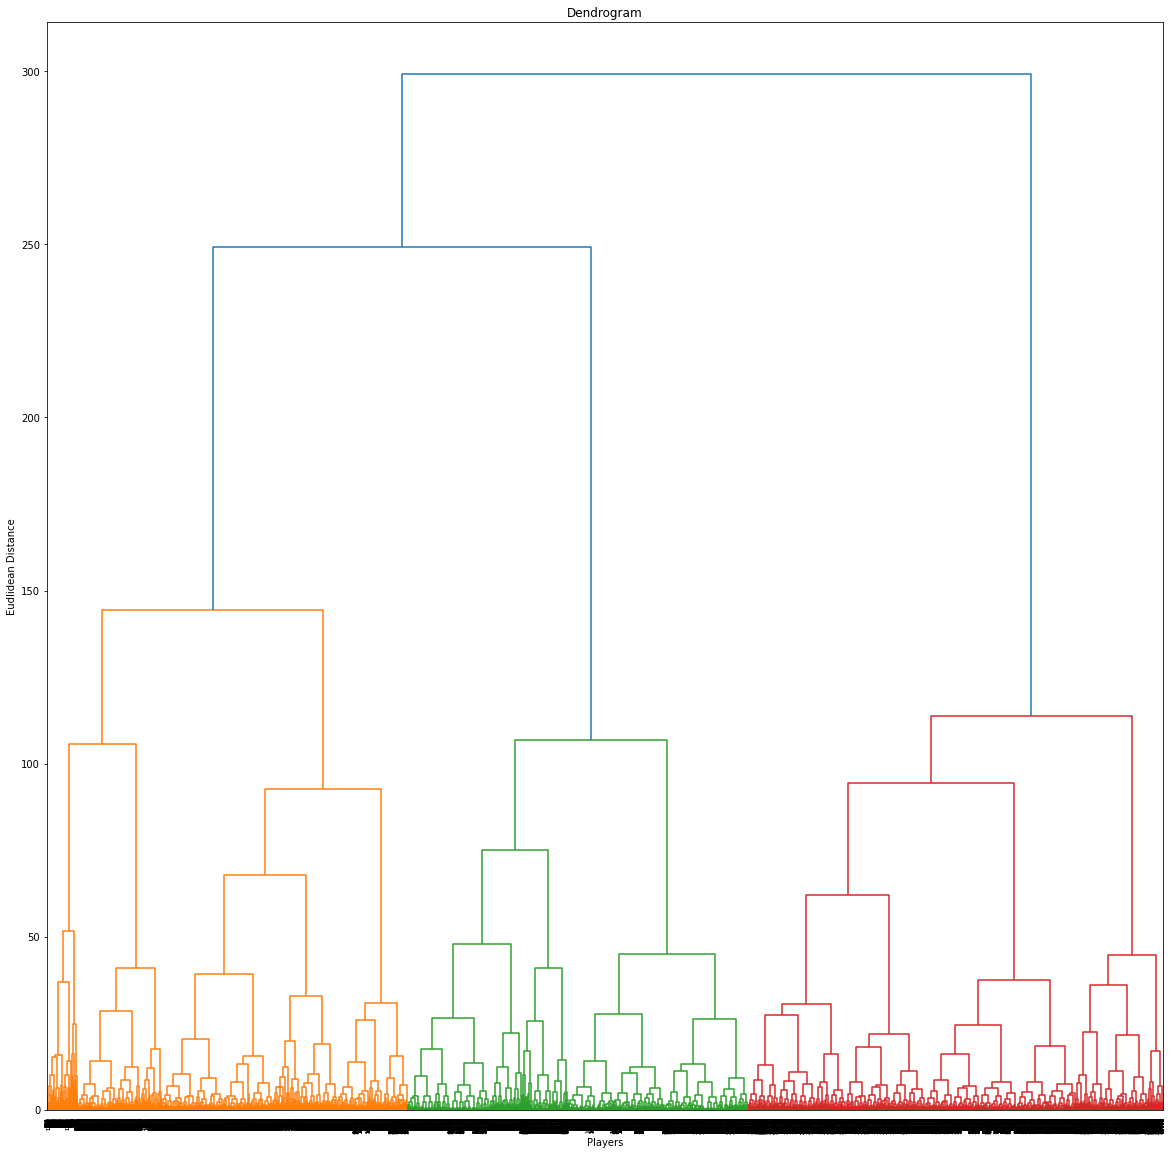

In [ ]:
plt.figure(figsize = (20,20))

dendrogram(ward_clustering,
           orientation='top',
           distance_sort='descending')


plt.title('Dendrogram')
plt.xlabel('Players')
plt.ylabel('Eudlidean Distance')
plt.show()

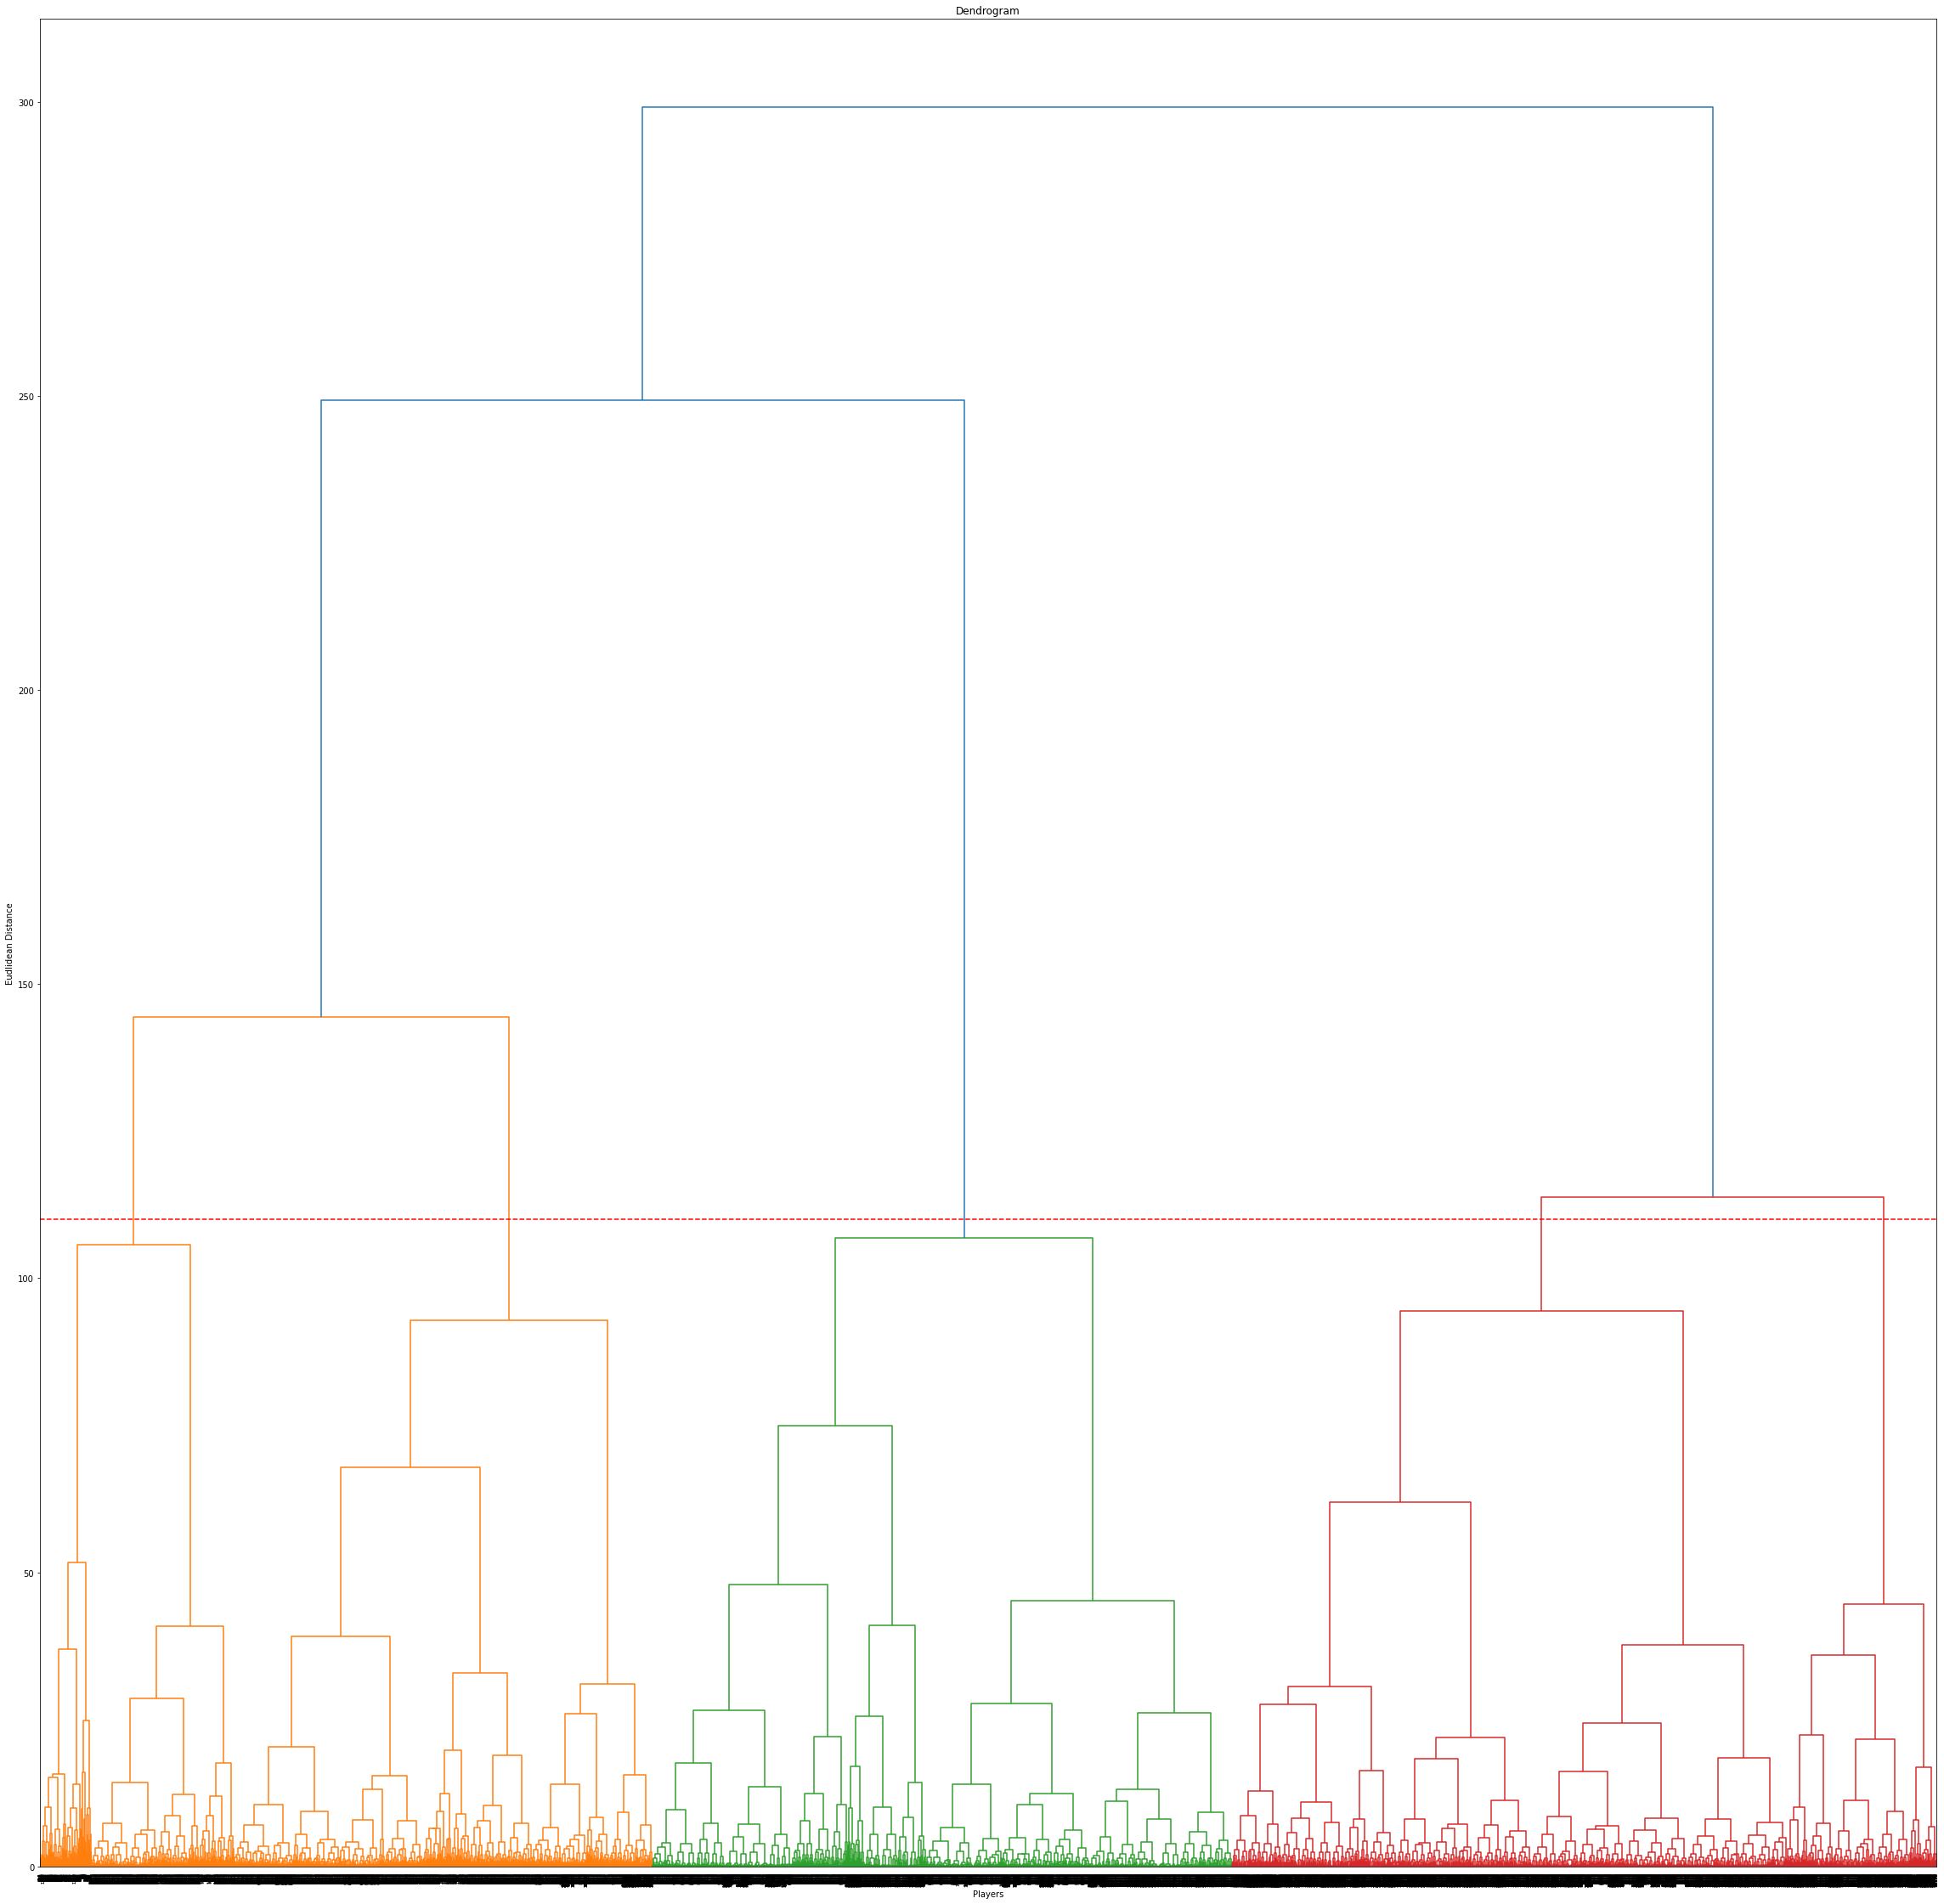

In [ ]:
plt.figure(figsize = (20,20))

dendrogram(ward_clustering,
           orientation='top',
           distance_sort='descending')

plt.axhline(y=110, 
            color='r', 
            linestyle='--')


plt.title('Dendrogram')
plt.xlabel('Players')
plt.ylabel('Eudlidean Distance')
plt.show()

**Q1.5** 
**In this comparision, I'm using the same dendogram in Q1.4**

In [ ]:
#Plotting the Elbow (Same as in LAB2_Q1)

#An array to store the distance values  
sum_of_sqrt_dist={}

#For loop for clusers from 2cluser  to 10clusters

for k in range(2,11):

    #Kmean Object
    km = KMeans(n_clusters = k, n_init = 1, random_state=1)

    #Learning the data from the columns overall and potentialv(Based on the graph) 
    km.fit_predict(new_data) 
    sum_of_sqrt_dist[k]= km.inertia_ 

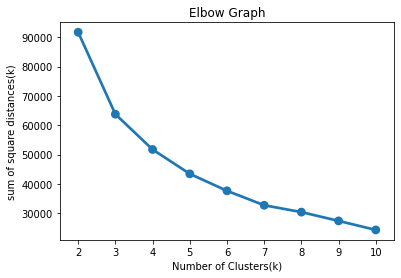

In [ ]:
sns.pointplot(x=list(sum_of_sqrt_dist.keys()), y=list(sum_of_sqrt_dist.values()))

plt.xlabel("Number of Clusters(k)")

plt.ylabel("sum of square distances(k)")

plt.title("Elbow Graph")

plt.show()

**Comparision: By using the dendogram I had 6 clusters while,  by the elbow, i had 3 cluster.**
**In this case, I think 6 clusters work well.**

**Q1.6 Apply Agglomerative ward clustering**

In [ ]:
heraricalClustering = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='average')
y_hc = heraricalClustering.fit_predict(new_data)
y_hc

array([4, 4, 4, ..., 0, 0, 0])

In [ ]:
new_data['cluster'] = pd.DataFrame(y_hc)

**Q1.7**

In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= new_data['potential'],
    y= new_data['wage_eur'],
    z= new_data['value_eur'],
    mode='markers',
     marker=dict(
        color = new_data['cluster'], 
        size= 10,
        line=dict(
            color= new_data['cluster'],
            width= 12
        ),
        opacity=0.8
     )

)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'potential'),
            yaxis = dict(title  = 'wage_eur'),
            zaxis = dict(title  = 'value_eur')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


**Q1.8: Explain the ward algorithm.**

### **Ward’s method** is an algorithm for finding a partition with small sum
### of squares. the ward's method start with a small sum of squares (by using lots of clusters) and then increasing it.

#**STEPS**:
1. Start with each point in a cluster by itself in a cluster(sum of squares = 0).
2. Merge two clusters, in order to produce the smallest increase in the sum
of squares (the smallest merging cost).
3. Keep merging until you’ve reached k clusters.


Examples of how the ward method works:


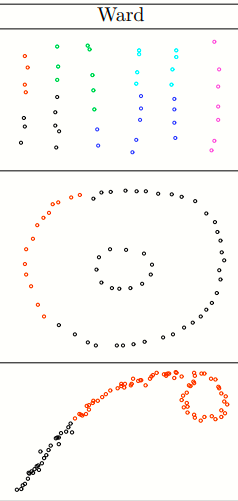

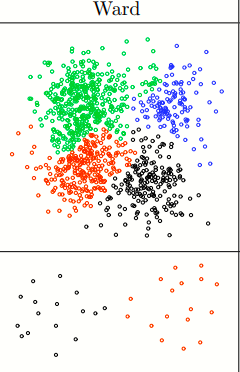